In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Modeling non-linear relationship using Polynomial Regression

In [2]:
# Model to predict marks given the number of courses taken and the time the student gives to study 
# on a daily basis.
data = pd.read_csv("AR - Examples - 1.6.csv")
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


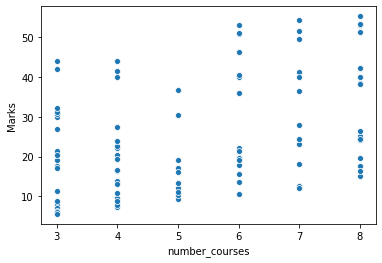

In [3]:
# Plotting a scatter plot
sns.scatterplot( data = data , x = 'number_courses' , y = 'Marks')

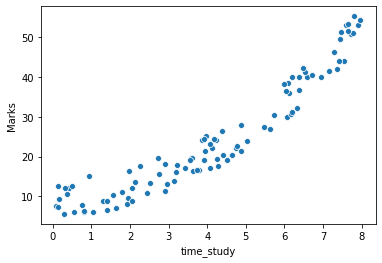

In [4]:
# Plotting a scatter plot
sns.scatterplot( data = data , x = 'time_study' , y = 'Marks')

In [5]:
# Splitting the dataset into X and y
X = data[['number_courses' , 'time_study']]
y = np.array(data['Marks']).reshape(-1,1)

In [6]:
# Building the regression model
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
#y_pred

In [8]:
# Find the value of r squared
r2_score(y , y_pred)

0.9403656320238896

In [9]:
# Calculate beta0 and beta1.
print(reg.intercept_)
print(reg.coef_)

[-7.45634623]
[[1.86405074 5.39917879]]


In [10]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

1211.6962069108952
12.116962069108952
3.4809426983374707


In [11]:
# Residual analysis
y_res = y - y_pred
#y_res

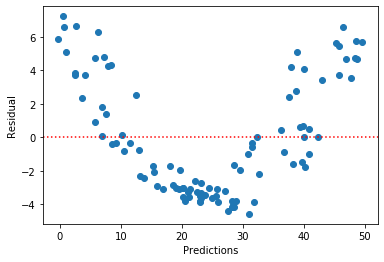

In [12]:
data['res'] = y_res
plt.scatter( y_pred , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

Checking which variable is non-linearly related to the response value

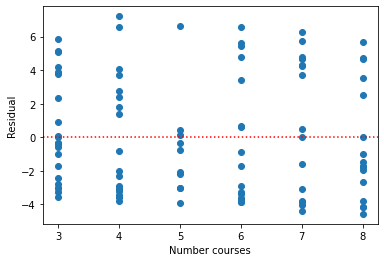

In [15]:
data['res'] = y_res
plt.scatter( data['number_courses'] , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Number courses")
plt.ylabel("Residual")
plt.show()

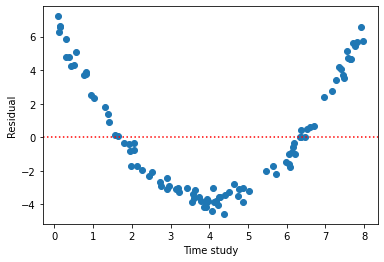

In [16]:
plt.scatter( data['time_study'] , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Time study")
plt.ylabel("Residual")
plt.show()

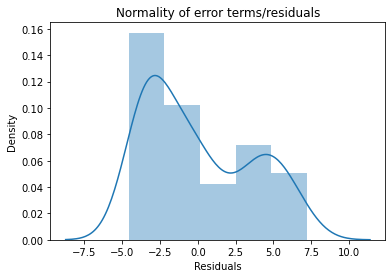

In [17]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Fitting Polynomial Regression Model 

In [14]:
# Transforming the time_study variable
data['time_study_squared'] = data['time_study']*data['time_study']

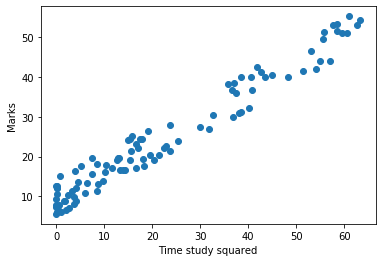

In [15]:
plt.scatter( data['time_study_squared'] , data['Marks'])
plt.xlabel("Time study squared")
plt.ylabel("Marks")
plt.show()

In [16]:
# Splitting the dataset into X and y
X = data[['number_courses' , 'time_study', 'time_study_squared']] 
y = np.array(data['Marks']).reshape(-1,1)

In [17]:
# Building the regression model
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
# y_pred

In [19]:
# Find the value of r squared
r2_score(y , y_pred)

0.9996529294889802

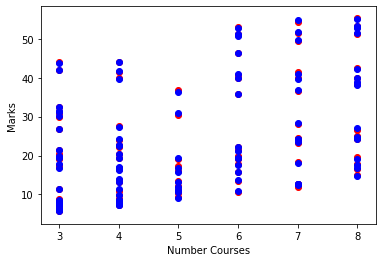

In [20]:
plt.scatter( X['number_courses'] , y , color = 'red')
plt.scatter( X['number_courses'] , y_pred , color = 'blue' )
plt.xlabel("Number Courses")
plt.ylabel("Marks")
plt.show()

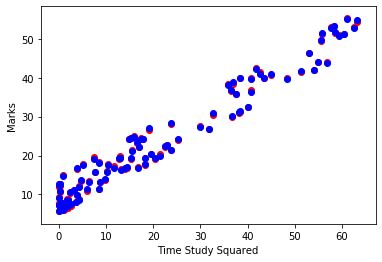

In [21]:
plt.scatter( X['time_study_squared'] , y , color = 'red')
plt.scatter( X['time_study_squared'] , y_pred , color = 'blue' )
plt.xlabel("Time Study Squared")
plt.ylabel("Marks")
plt.show()

In [22]:
# Calculate beta0 and beta1.
print(reg.intercept_)
print(reg.coef_)

[0.56299581]
[[ 1.70546941 -0.02855268  0.67346253]]


In [23]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

7.052041230683783
0.07052041230683784
0.26555679676264704


In [24]:
# Residual analysis
y_res = y - y_pred
#y_res

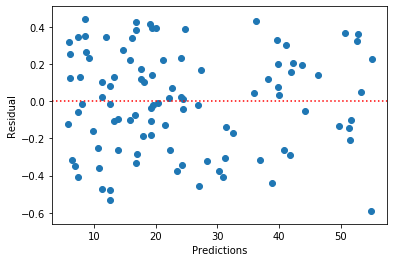

In [25]:
data['res'] = y_res
plt.scatter( y_pred , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

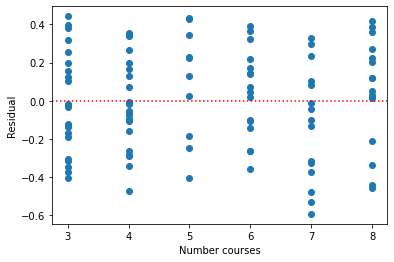

In [30]:
data['res'] = y_res
plt.scatter( data['number_courses'] , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Number courses")
plt.ylabel("Residual")
plt.show()

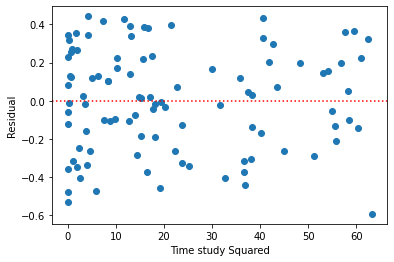

In [31]:
plt.scatter( data['time_study_squared'] , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Time study Squared")
plt.ylabel("Residual")
plt.show()

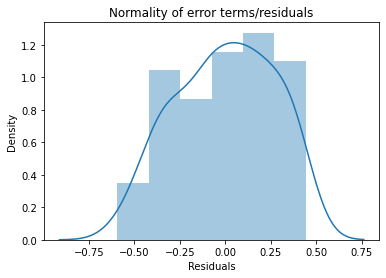

In [32]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Modeling non-linear relationships using data transformation

Here, we need to make a model which predicts how much distance is covered by a truck in a given time unit after a break is applied.

In [33]:
dist = pd.read_csv(r"AR - Examples - 1.5.csv")
dist.head()

,time,distance
0,1,0.419660
1,2,1.350692
2,3,2.470342
3,4,1.566856
4,5,1.595280


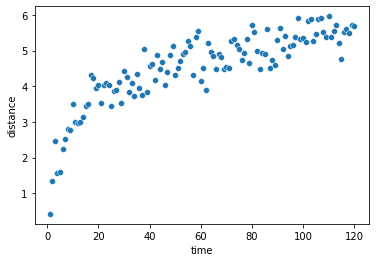

In [34]:
# Plotting a scatter plot
sns.scatterplot( data = dist , x ='time' , y='distance')
plt.show()

In [35]:
# Splitting the dataset into X and y
X = np.array(dist['time']).reshape(-1,1)
y = np.array(dist['distance']).reshape(-1,1)

In [36]:
# Building the regression model
model = LinearRegression()

In [37]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Predictions on the basis of the model
y_pred2 = model.predict(X)
# y_pred2

In [39]:
# Find the value of r squared
r2_score(y, y_pred2)

0.7019700219367477

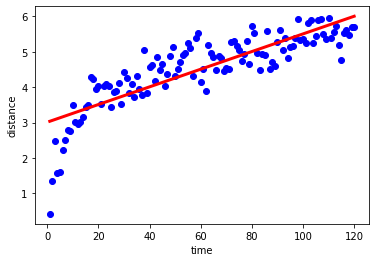

In [40]:
plt.scatter( X , y , color = 'blue')
plt.plot(X , y_pred2 , color = 'red' , linewidth = 3)
plt.xlabel("time")
plt.ylabel("distance")
plt.show()

In [41]:
# Calculate beta0 and beta1.
print(model.intercept_)
print(model.coef_)

[3.01233335]
[[0.02494362]]


In [42]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y - y_pred2))
print(rss)
mse = mean_squared_error(y, y_pred2)
print(mse)
rmse = mse**0.5
print(rmse)


38.035808448707726
0.3169650704058977
0.5629965101187553


In [43]:
#residual
residual = y - y_pred2

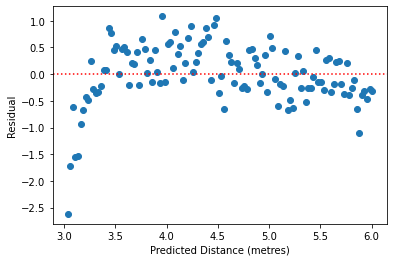

In [44]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter( y_pred2 , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel("Residual")
plt.show()

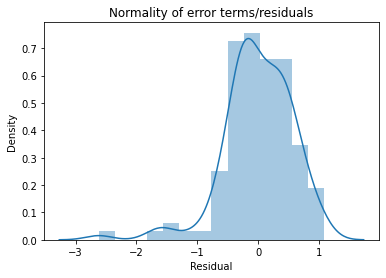

In [45]:
# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

In [46]:
# As we can see that the residuals do not fulfill the conditions for linear regression, Lets see if we can make some changes so that the residuals are normally distributed.

dist['time (seconds)(log)'] = np.log(dist['time'])

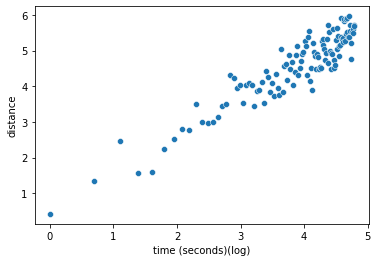

In [47]:
# Plotting a scatter plot
sns.scatterplot( data = dist , x ='time (seconds)(log)' , y='distance')
plt.show()

In [48]:
# Splitting the dataset into X and y
X = np.array(dist['time (seconds)(log)']).reshape(-1,1)
y = np.array(dist['distance']).reshape(-1,1)

In [49]:
# Building the regression model
model = LinearRegression()

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# Predictions on the basis of the model
y_pred2 = model.predict(X)
# y_pred2

In [51]:
# Find the value of r squared
r2_score(y, y_pred2)

0.8717123012103078

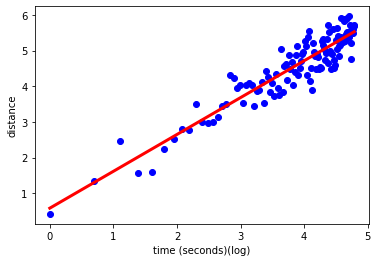

In [52]:
plt.scatter( X , y , color = 'blue')
plt.plot(X , y_pred2 , color = 'red' , linewidth = 3)
plt.xlabel("time (seconds)(log)")
plt.ylabel("distance")
plt.show()

In [53]:
# Calculate beta0 and beta1.
print(model.intercept_)
print(model.coef_)

[0.58066733]
[[1.03293534]]


In [54]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y - y_pred2))
print(rss)
mse = mean_squared_error(y, y_pred2)
print(mse)
rmse = mse**0.5
print(rmse)

16.37260241134079
0.13643835342783991
0.36937562646693395


In [55]:
#residual
residual = y - y_pred2

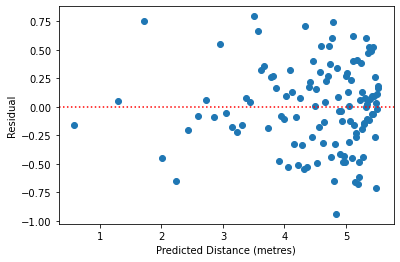

In [56]:
plt.scatter( y_pred2 , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel("Residual")
plt.show()

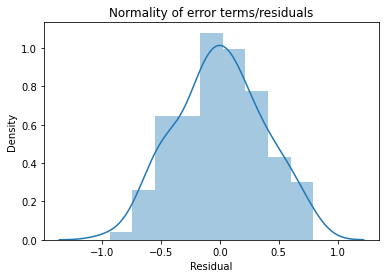

In [57]:

# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()